In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
def plot_heating_cost(cost_per_kWh=0.17, cost_per_BTU_gas=0.00001444, therms_per_day=5):
    COP_values = np.linspace(1, 6, 100)  # COP range from 1 to 6
    cost_per_BTU_hp = cost_per_kWh / (COP_values * 3412)  # Cost per BTU for heat pump
    cost_per_therm_hp = cost_per_BTU_hp * 100000  # Cost per therm for heat pump
    cost_per_therm_gas = cost_per_BTU_gas * 100000  # Cost per therm for gas furnace
    
    daily_cost_hp = cost_per_therm_hp * therms_per_day
    daily_cost_gas = cost_per_therm_gas * therms_per_day
    monthly_cost_hp = daily_cost_hp * 30  # Assuming 30 days in a month
    monthly_cost_gas = daily_cost_gas * 30
    
    fig, axs = plt.subplots(3, 1, figsize=(8, 12))
    
    # Plot 1: Cost per BTU
    axs[0].plot(COP_values, cost_per_BTU_hp, label='Heat Pump Cost per BTU', color='blue')
    axs[0].axhline(cost_per_BTU_gas, color='red', linestyle='--', label='Gas Furnace Cost per BTU')
    axs[0].axvline(cost_per_kWh / (cost_per_BTU_gas * 3412), color='green', linestyle=':', label='Break-even COP')
    axs[0].set_xlabel('COP (Coefficient of Performance)')
    axs[0].set_ylabel('Cost per BTU ($)')
    axs[0].set_title('Heating Cost per BTU vs. COP')
    axs[0].legend()
    axs[0].grid()
    
    # Plot 2: Cost per Therm
    axs[1].plot(COP_values, cost_per_therm_hp, label='Heat Pump Cost per Therm', color='blue')
    axs[1].axhline(cost_per_therm_gas, color='red', linestyle='--', label='Gas Furnace Cost per Therm')
    axs[1].set_xlabel('COP (Coefficient of Performance)')
    axs[1].set_ylabel('Cost per Therm ($)')
    axs[1].set_title('Heating Cost per Therm vs. COP')
    axs[1].legend()
    axs[1].grid()
    
    # Plot 3: Monthly Heating Cost
    axs[2].plot(COP_values, monthly_cost_hp, label='Heat Pump Monthly Cost', color='blue')
    axs[2].axhline(monthly_cost_gas, color='red', linestyle='--', label='Gas Furnace Monthly Cost')
    axs[2].set_xlabel('COP (Coefficient of Performance)')
    axs[2].set_ylabel('Monthly Cost ($)')
    axs[2].set_title(f'Monthly Heating Cost (Therms per day = {therms_per_day})')
    axs[2].legend()
    axs[2].grid()
    
    plt.tight_layout()
    plt.show()

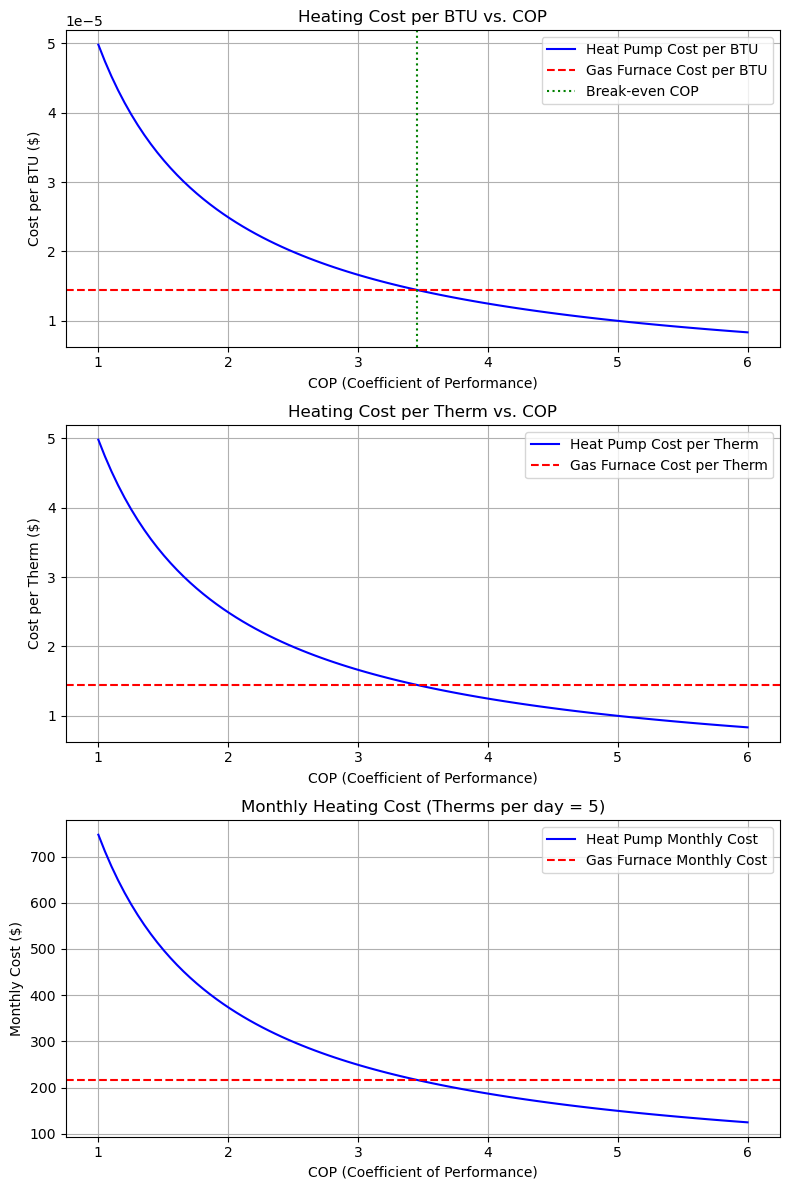

In [5]:
# Example usage with default values
plot_heating_cost()

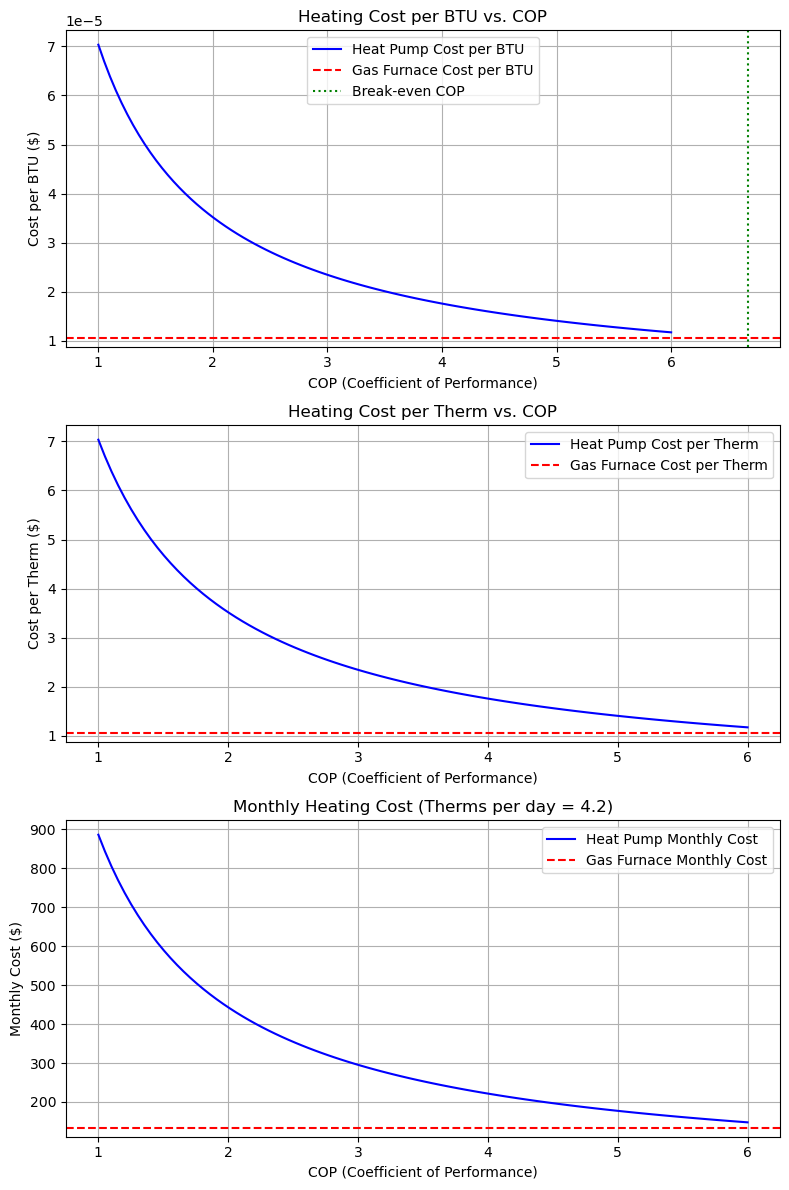

In [7]:
# Example using actual values: 
electricity_price = 0.24 # [USD/kWh]
gas_price = 0.036 # [USD/kWh]
therms_per_day = 4.2

cost_per_kWh = electricity_price
cost_per_BTU_gas = gas_price*0.000293071

plot_heating_cost(cost_per_kWh, cost_per_BTU_gas, therms_per_day)